<a href="https://colab.research.google.com/github/meghanjukl-meg/ICTK_Assignment/blob/main/Unsupervised_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd

In [73]:
data = pd.read_csv('/content/Wine_clust.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [74]:
data.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Making a copy

In [76]:
wine_clust = data.copy()

Scaling

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [78]:
df_scaled = pd.DataFrame(scaled,columns = data.columns)

In [79]:
df_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## KMeans Clustering

Elbow method

In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [81]:
wcss = []
for i in range (1,10):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state= 42)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

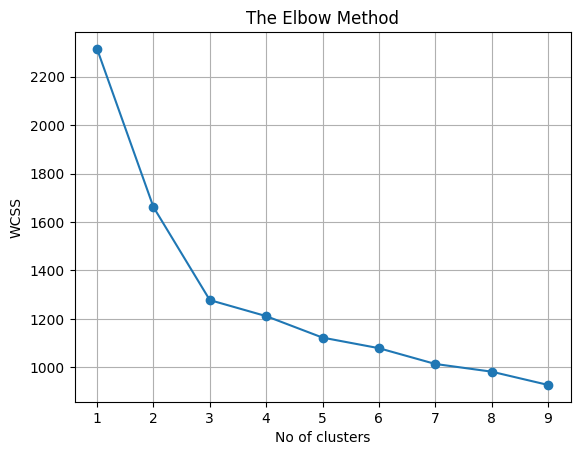

In [82]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),wcss,marker ='o')
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

--> from the plot **K=3**

Model with 3 clusters

In [83]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state= 42)
#predict
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [84]:
# Add the cluster labels back to dataframe
wine_clust['KM_Cluster'] = y_kmeans
wine_clust.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KM_Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [85]:
wine_clust['KM_Cluster'].unique()

array([2, 0, 1], dtype=int32)

Checking using **Silhouette Score**

In [86]:
sil_score =[]
for i in range(2,10):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state= 42)
  y_kmean = kmeans.fit_predict(df_scaled)
  s_score = silhouette_score(df_scaled,y_kmean)
  sil_score.append(s_score)
  print(f"for k={i}: score={s_score:.4f}")

for k=2: score=0.2650
for k=3: score=0.2849
for k=4: score=0.2542
for k=5: score=0.1836
for k=6: score=0.1690
for k=7: score=0.1726
for k=8: score=0.1625
for k=9: score=0.1739


from this **optimum number of clusters** is 3, as it yields the highest Silhouette Score (0.2849).


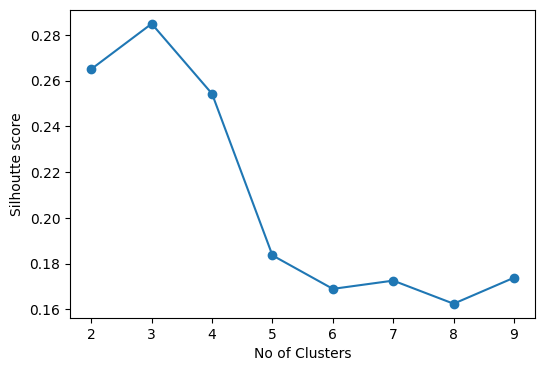

In [87]:
plt.figure(figsize=(6,4))
x=range(2,10)
plt.plot(x,sil_score,marker='o')
plt.xlabel('No of Clusters')
plt.ylabel('Silhoutte score')
plt.show()

Reducing data and plotting

In [88]:
from sklearn.decomposition import PCA

In [89]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

In [90]:
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['KMeans_Cluster'] = y_kmeans

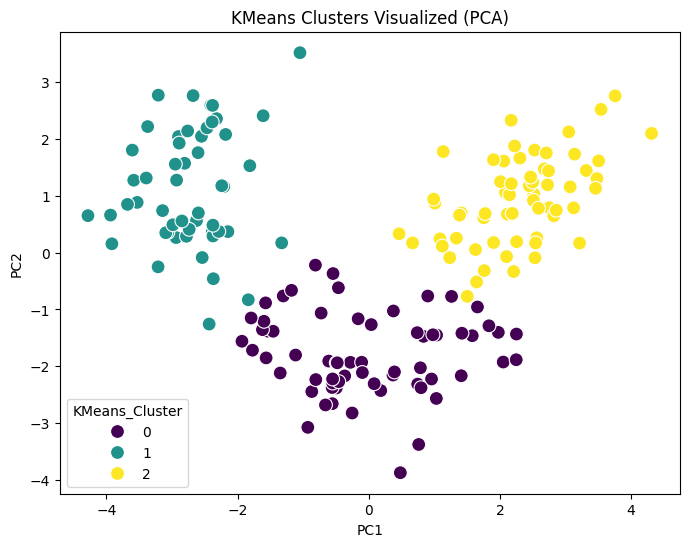

In [91]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=pca_df, palette='viridis', s=100)
plt.title('KMeans Clusters Visualized (PCA)')
plt.show()

Agglomerative Hierarchichal clustering

Dendrogram to find k

In [92]:
import scipy.cluster.hierarchy as sch

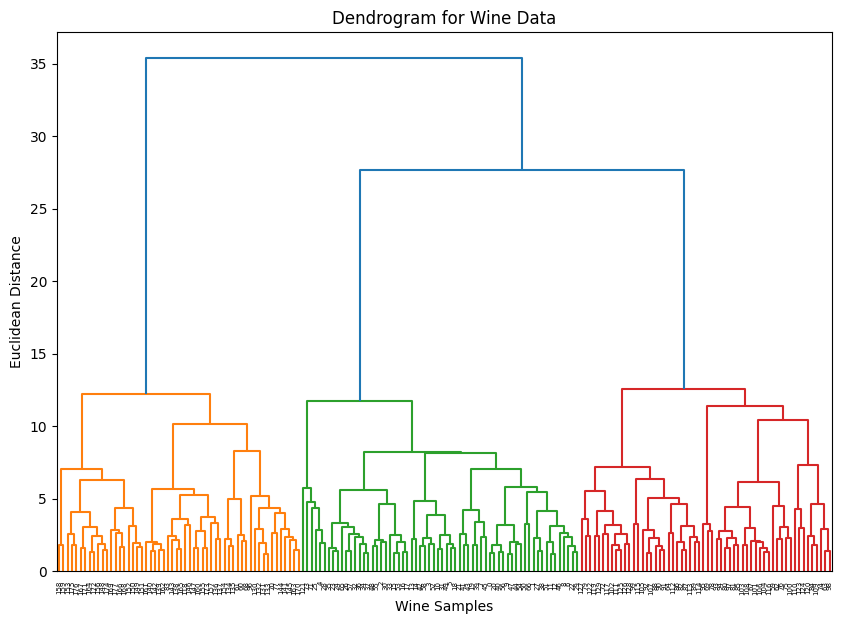

In [93]:
plt.figure(figsize=(10,7))
dendro = sch.dendrogram(sch.linkage(df_scaled,method='ward'))
plt.title('Dendrogram for Wine Data')
plt.xlabel('Wine Samples')
plt.ylabel('Euclidean Distance')
plt.show()


 Suggested number of clusters: 3


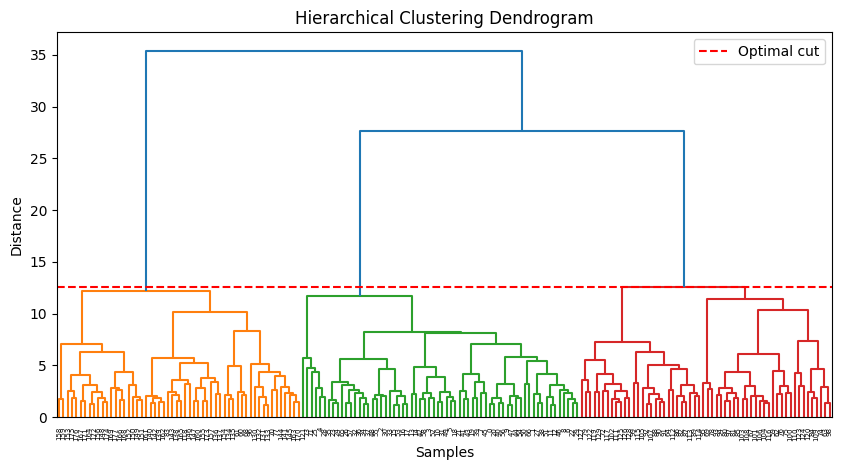

In [94]:
from scipy.cluster.hierarchy import fcluster

Z = sch.linkage(df_scaled, method='ward')

distances = Z[:, 2]

acceleration = np.diff(distances, 2)

#  Locate maximum acceleration

idx = np.argmax(acceleration)

#  Compute optimal number of clusters
n_samples = df_scaled.shape[0]
optimal_k = n_samples - (idx + 2)
print("\n Suggested number of clusters:", optimal_k)

#  Compute cut height

cut_height = distances[idx + 1]
#  Get cluster labels
labels = fcluster(Z, t=cut_height, criterion='distance')

#  Plot dendrogram with cut line
plt.figure(figsize=(10, 5))
sch.dendrogram(Z)
plt.axhline(y=cut_height, color='r', linestyle='--', label='Optimal cut')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.legend()
plt.show()

model with k=3

In [95]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=3,metric ='euclidean',linkage='ward')
#fit
y_agc = agc.fit_predict(df_scaled)
y_agc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [96]:
wine_clust['AHC_Clust']= y_agc
wine_clust.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KM_Cluster,AHC_Clust
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,2


Silhouette Score

In [97]:
a_sil_score =[]
for i in range(2,10):
  agc = AgglomerativeClustering(n_clusters=i,metric ='euclidean',linkage='ward')
  y_agc = agc.fit_predict(df_scaled)
  s_score = silhouette_score(df_scaled,y_agc)
  a_sil_score.append(s_score)
  print(f"for k={i}: score={s_score:.4f}")

for k=2: score=0.2670
for k=3: score=0.2774
for k=4: score=0.2258
for k=5: score=0.1867
for k=6: score=0.1797
for k=7: score=0.1869
for k=8: score=0.1883
for k=9: score=0.1917


 confirming that 3 clusters is the most suited

DBSCAN

In [98]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2,min_samples=8)
clusters =dbscan.fit_predict(df_scaled)
np.unique(clusters)

array([-1,  0,  1,  2])

In [99]:
X_copy = pca_df.copy()
X_copy['Clusters']= clusters

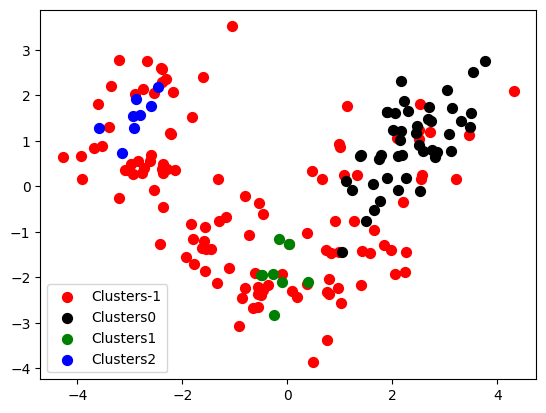

In [100]:
colors = ['black','g','b','r']
for i in range(-1,3):
  cluster_data = X_copy[clusters == i]
  plt.scatter(cluster_data['PC1'],
              cluster_data['PC2'],
              s = 50,c=colors[i],
              label = f'Clusters{i}')
plt.legend()
plt.show()

Based on these methods, we can conclude that the optimal number of clusters is 3